Integrantes
-   Alejos Yarasca Fiorella Andrea (fiorella.alejos.y@uni.pe)
-   Llana Chavez Walter Rodolfo (walter.llana.c@uni.pe)
-   Luna Jaramillo Juan Marcos (juan.luna.j@uni.pe)
-   Medina Rodríguez Henry (hmedinar@uni.pe)
-   Salazar Vega Edwin Martín (edwin@iartificial.io)


# Tarea 1 - Redes neuronales

## Ejercicio 2

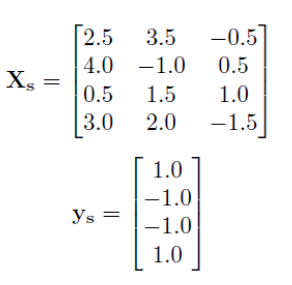

### 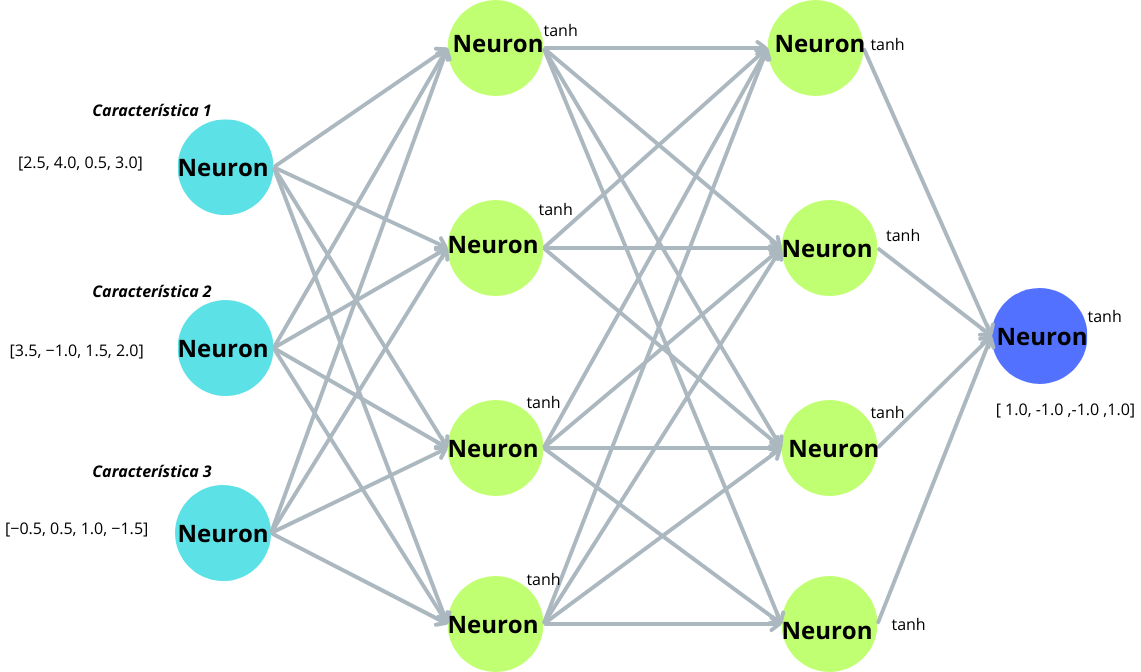

### Implementación con Micrograd

In [ ]:
!pip install micrograd

In [ ]:
import math
import numpy as np
from micrograd.engine import Value

# Definir una clase de Neurona
class Neurona:
    def __init__(self, n_entradas, pesos=None, bias=None):
        if pesos is None:
            self.pesos = [Value(np.random.randn()) for _ in range(n_entradas)]
        else:
            self.pesos = [Value(w) for w in pesos]
        self.bias = Value(bias if bias is not None else np.random.randn())

    def __call__(self, x):
        activacion = sum((wi * xi for wi, xi in zip(self.pesos, x)), self.bias)
        exp_pos = math.exp(activacion.data)
        exp_neg = math.exp(-activacion.data)
        tanh_valor = (exp_pos - exp_neg) / (exp_pos + exp_neg)
        return Value(tanh_valor)

class Capa:
    def __init__(self, n_entradas, n_neuronas, pesos=None, biases=None):
        if pesos is None:
            self.neuronas = [Neurona(n_entradas) for _ in range(n_neuronas)]
        else:
            self.neuronas = [Neurona(n_entradas, peso, bias) for peso, bias in zip(pesos, biases)]

    def __call__(self, x):
        return [neurona(x) for neurona in self.neuronas]

class MLP:
    def __init__(self, estructura, pesos=None, biases=None):
        capas = []
        for i in range(len(estructura) - 1):
            capas.append(Capa(estructura[i], estructura[i+1],
                              pesos[i] if pesos is not None else None,
                              biases[i] if biases is not None else None))
        self.capas = capas

    def __call__(self, x):
        for capa in self.capas:
            x = capa(x)
        return x[0]

# Función de pérdida (MSE)
def mse_loss(y_pred, y_real):
    return sum([(yp - yr)**2 for yp, yr in zip(y_pred, y_real)]) / len(y_real)

# Datos de entrada
X_s = [
    [2.5, 3.5, -0.5],
    [4.0, -1.0, 0.5],
    [0.5, 1.5, 1.0],
    [3.0, 2.0, -1.5]
]

# Etiquetas
y_s = [1.0, -1.0, -1.0, 1.0]

# Estructura del MLP
estructura = [3, 4, 4, 1]

# Pesos iniciales
pesos1 = [
    [0.00418492702436879, 0.43075487690967607, -0.4282565031009904],
    [0.5158558846557311, 0.5819550111766021, -0.8088029951912754],
    [-0.44835832271820397, 0.38031895464530585, -0.5665208363970418],
    [0.7429447941285752, -0.4746263677602629, 0.8949930247921201]
]

biases1 = [0.32206783013775775, -0.8686507446696847, 0.018075310323074634, 0.17709258735126432]

pesos2 = [
    [-0.8049392563546165, -0.49989970805506223, -0.11040622481498752, 0.6488610351165072],
    [0.9106209221005506, -0.019296335734448, -0.3698365604587379, -0.4895868360031945],
    [-0.6609560349975847, -0.9560446284058173, 0.10824475517169851, 0.611275384042882],
    [0.8411566571608489, -0.013218235445775939, 0.9342264201408781, 0.05702543031001284]
]

biases2 = [-0.11802212336116158, 0.22209342708457336, 0.7164897385943987, -0.9907541859895936]

pesos_salida = [
    [0.005437266894224635, -0.9489167963463787, 0.07198349639302193, -0.8783725464793719]
]

bias_salida = [-0.9695536926056374]

pesos = [pesos1, pesos2, pesos_salida]
biases = [biases1, biases2, bias_salida]

# Instanciar el modelo
mlp = MLP(estructura, pesos, biases)

# Tasa de aprendizaje
learning_rate = 0.1

# Mostrar los pesos iniciales de todas las capas
print("Pesos y biases iniciales:\n")
for i, capa in enumerate(mlp.capas):
    print(f"Capa {i+1}:")
    for j, neurona in enumerate(capa.neuronas):
        print(f"  Neurona {j+1} - Pesos: {[p.data for p in neurona.pesos]}, Bias: {neurona.bias.data}")

# Forward pass
salidas = [mlp(x) for x in X_s]

# Mostrar salidas (Forward pass)
print("\nSalidas predichas (Forward pass):")
for i, salida in enumerate(salidas):
    print(f"Ejemplo {i+1} - Salida predicha: {salida.data}")

# Calcular pérdida
loss = mse_loss(salidas, y_s)
print(f"\nPérdida (Loss): {loss.data}")

# Backward pass
loss.backward()

# Mostrar gradientes de los pesos y biases de todas las capas
print("\nGradientes de los pesos y biases:\n")
for i, capa in enumerate(mlp.capas):
    print(f"Capa {i+1}:")
    for j, neurona in enumerate(capa.neuronas):
        print(f"  Neurona {j+1} - Gradientes de pesos: {[p.grad for p in neurona.pesos]}, Gradiente de Bias: {neurona.bias.grad}")

# Actualizar los pesos
for capa in mlp.capas:
    for neurona in capa.neuronas:
        for peso in neurona.pesos:
            peso.data -= learning_rate * peso.grad
        neurona.bias.data -= learning_rate * neurona.bias.grad

# Mostrar los pesos actualizados de todas las capas
print("\nPesos y biases actualizados:\n")
for i, capa in enumerate(mlp.capas):
    print(f"Capa {i+1}:")
    for j, neurona in enumerate(capa.neuronas):
        print(f"  Neurona {j+1} - Pesos: {[p.data for p in neurona.pesos]}, Bias: {neurona.bias.data}")


Pesos y biases iniciales:

Capa 1:
  Neurona 1 - Pesos: [0.00418492702436879, 0.43075487690967607, -0.4282565031009904], Bias: 0.32206783013775775
  Neurona 2 - Pesos: [0.5158558846557311, 0.5819550111766021, -0.8088029951912754], Bias: -0.8686507446696847
  Neurona 3 - Pesos: [-0.44835832271820397, 0.38031895464530585, -0.5665208363970418], Bias: 0.018075310323074634
  Neurona 4 - Pesos: [0.7429447941285752, -0.4746263677602629, 0.8949930247921201], Bias: 0.17709258735126432
Capa 2:
  Neurona 1 - Pesos: [-0.8049392563546165, -0.49989970805506223, -0.11040622481498752, 0.6488610351165072], Bias: -0.11802212336116158
  Neurona 2 - Pesos: [0.9106209221005506, -0.019296335734448, -0.3698365604587379, -0.4895868360031945], Bias: 0.22209342708457336
  Neurona 3 - Pesos: [-0.6609560349975847, -0.9560446284058173, 0.10824475517169851, 0.611275384042882], Bias: 0.7164897385943987
  Neurona 4 - Pesos: [0.8411566571608489, -0.013218235445775939, 0.9342264201408781, 0.05702543031001284], Bias: -0

### Implementación con Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Definir la red neuronal con PyTorch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        # Definir las capas con los mismos tamaños que la implementación de micrograd
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)

        # Inicializar los pesos y biases manualmente para que coincidan con los de micrograd
        with torch.no_grad():
            self.fc1.weight = nn.Parameter(torch.tensor([
                [0.00418492702436879, 0.43075487690967607, -0.4282565031009904],
                [0.5158558846557311, 0.5819550111766021, -0.8088029951912754],
                [-0.44835832271820397, 0.38031895464530585, -0.5665208363970418],
                [0.7429447941285752, -0.4746263677602629, 0.8949930247921201]
            ]))
            self.fc1.bias = nn.Parameter(torch.tensor([0.32206783013775775, -0.8686507446696847, 0.018075310323074634, 0.17709258735126432]))

            self.fc2.weight = nn.Parameter(torch.tensor([
                [-0.8049392563546165, -0.49989970805506223, -0.11040622481498752, 0.6488610351165072],
                [0.9106209221005506, -0.019296335734448, -0.3698365604587379, -0.4895868360031945],
                [-0.6609560349975847, -0.9560446284058173, 0.10824475517169851, 0.611275384042882],
                [0.8411566571608489, -0.013218235445775939, 0.9342264201408781, 0.05702543031001284]
            ]))
            self.fc2.bias = nn.Parameter(torch.tensor([-0.11802212336116158, 0.22209342708457336, 0.7164897385943987, -0.9907541859895936]))

            self.fc3.weight = nn.Parameter(torch.tensor([[0.005437266894224635, -0.9489167963463787, 0.07198349639302193, -0.8783725464793719]]))
            self.fc3.bias = nn.Parameter(torch.tensor([-0.9695536926056374]))

    def forward(self, x):
        # Pasar los datos por la red utilizando la función tanh
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

# Función para imprimir de forma legible
def print_formatted(title, data):
    print(f"\n--- {title} ---")
    for name, param in data.items():
        if isinstance(param, torch.Tensor):
            param = param.detach().numpy()
        if isinstance(param, np.ndarray):
            param = np.round(param, decimals=4)  # Redondear a 4 decimales
        print(f"{name}: \n{param}")

# Inicializar la red y los datos
mlp_pytorch = MLP()
criterion = nn.MSELoss()  # Función de pérdida (Mean Squared Error)

# Definir los datos de entrada y las etiquetas (salidas esperadas)
X_s = torch.tensor([[2.5, 3.5, -0.5],
                    [4.0, -1.0, 0.5],
                    [0.5, 1.5, 1.0],
                    [3.0, 2.0, -1.5]], dtype=torch.float32)

y_s = torch.tensor([1.0, -1.0, -1.0, 1.0], dtype=torch.float32).view(-1, 1)

# Obtener los pesos y biases antes del forward pass
params_before = {
    'fc1.weight': mlp_pytorch.fc1.weight,
    'fc1.bias': mlp_pytorch.fc1.bias,
    'fc2.weight': mlp_pytorch.fc2.weight,
    'fc2.bias': mlp_pytorch.fc2.bias,
    'fc3.weight': mlp_pytorch.fc3.weight,
    'fc3.bias': mlp_pytorch.fc3.bias
}

# Mostrar los pesos y biases antes de la actualización
print_formatted("Pesos y Biases antes de la actualización", params_before)

# Calcular el forward pass
outputs = mlp_pytorch(X_s)

# Calcular la pérdida (Loss)
loss = criterion(outputs, y_s)

# Mostrar las salidas predichas (forward pass)
print("\n--- Salidas predichas (Forward pass) ---")
print(np.round(outputs.detach().numpy(), decimals=4))

# Mostrar la pérdida
print(f"\nPérdida (Loss): {np.round(loss.item(), decimals=4)}")

# Calcular el backward pass (retropropagación)
mlp_pytorch.zero_grad()  # Limpiar los gradientes antes de calcularlos
loss.backward()

# Obtener los gradientes después del backward pass
grads = {
    'fc1.weight': mlp_pytorch.fc1.weight.grad,
    'fc1.bias': mlp_pytorch.fc1.bias.grad,
    'fc2.weight': mlp_pytorch.fc2.weight.grad,
    'fc2.bias': mlp_pytorch.fc2.bias.grad,
    'fc3.weight': mlp_pytorch.fc3.weight.grad,
    'fc3.bias': mlp_pytorch.fc3.bias.grad
}

# Mostrar los gradientes calculados
print_formatted("Gradientes de los pesos y biases (Backward pass)", grads)

# Optimizar (ajustar los pesos)
optimizer = optim.SGD(mlp_pytorch.parameters(), lr=0.1)
optimizer.step()

# Obtener los pesos y biases después de la actualización
params_after = {
    'fc1.weight': mlp_pytorch.fc1.weight,
    'fc1.bias': mlp_pytorch.fc1.bias,
    'fc2.weight': mlp_pytorch.fc2.weight,
    'fc2.bias': mlp_pytorch.fc2.bias,
    'fc3.weight': mlp_pytorch.fc3.weight,
    'fc3.bias': mlp_pytorch.fc3.bias
}

# Mostrar los pesos y biases después de la actualización
print_formatted("Pesos y Biases después de la actualización", params_after)



--- Pesos y Biases antes de la actualización ---
fc1.weight: 
[[ 0.0042  0.4308 -0.4283]
 [ 0.5159  0.582  -0.8088]
 [-0.4484  0.3803 -0.5665]
 [ 0.7429 -0.4746  0.895 ]]
fc1.bias: 
[ 0.3221 -0.8687  0.0181  0.1771]
fc2.weight: 
[[-0.8049 -0.4999 -0.1104  0.6489]
 [ 0.9106 -0.0193 -0.3698 -0.4896]
 [-0.661  -0.956   0.1082  0.6113]
 [ 0.8412 -0.0132  0.9342  0.057 ]]
fc2.bias: 
[-0.118   0.2221  0.7165 -0.9908]
fc3.weight: 
[[ 0.0054 -0.9489  0.072  -0.8784]]
fc3.bias: 
[-0.9696]

--- Salidas predichas (Forward pass) ---
[[-0.9593]
 [ 0.1131]
 [-0.6454]
 [-0.9423]]

Pérdida (Loss): 2.244

--- Gradientes de los pesos y biases (Backward pass) ---
fc1.weight: 
[[-1.7922e+00  3.5420e-01 -3.3860e-01]
 [-7.1000e-03  1.8000e-03 -1.0000e-03]
 [ 2.9570e-01  2.2190e-01 -1.3510e-01]
 [-8.7900e-02 -5.9400e-02  6.2800e-02]]
fc1.bias: 
[-0.524  -0.0018  0.085  -0.0125]
fc2.weight: 
[[-5.000e-04 -1.000e-04 -1.900e-03  2.100e-03]
 [ 1.899e-01  1.920e-02  5.434e-01 -5.523e-01]
 [-9.500e-03 -6.100e-03 

### Gráficar MLP

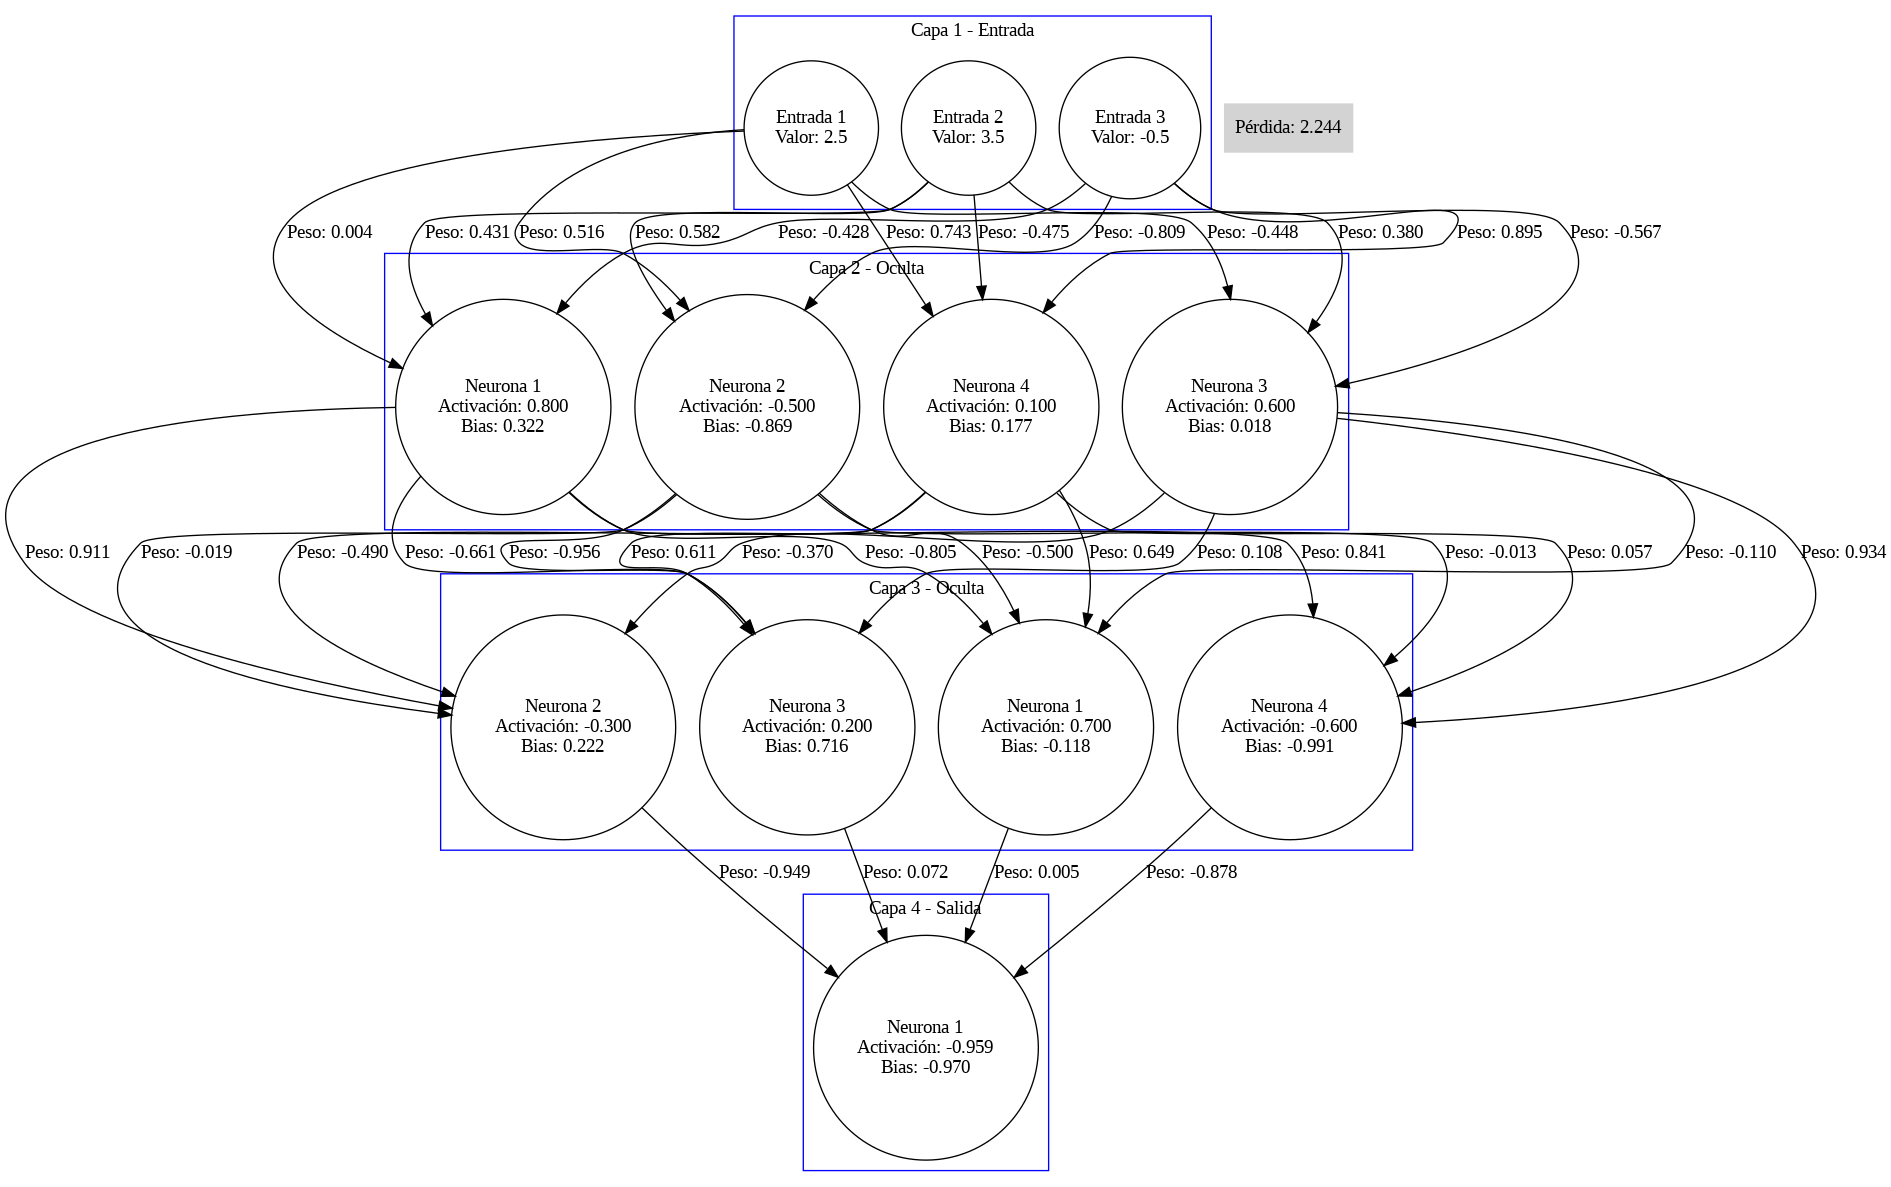

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Definir una clase para graficar el MLP con pesos, activaciones y biases
def graficar_mlp_con_forward(estructura, pesos, biases, activaciones, entradas, predicciones, perdida):
    dot = Digraph(format='png')

    # Crear los nodos de las capas
    for i, num_neuronas in enumerate(estructura):
        with dot.subgraph(name=f'cluster_{i}') as c:
            if i == 0:
                c.attr(label=f'Capa {i+1} - Entrada')
            elif i == len(estructura) - 1:
                c.attr(label=f'Capa {i+1} - Salida')
            else:
                c.attr(label=f'Capa {i+1} - Oculta')
            c.attr(color='blue')
            for j in range(num_neuronas):
                if i == 0:
                    # Mostrar valores de entrada
                    c.node(f'N{i}_{j}', f'Entrada {j+1}\nValor: {entradas[j]}', shape='circle')
                else:
                    # Mostrar activación y bias (no hacer esto en la capa de entrada)
                    activacion = activaciones[i-1][j] if i < len(estructura) - 1 else predicciones[j]
                    bias = biases[i-1][j] if i < len(estructura) else biases[-1][j]
                    c.node(f'N{i}_{j}', f'Neurona {j+1}\nActivación: {activacion:.3f}\nBias: {bias:.3f}', shape='circle')

    # Conectar las capas y mostrar los pesos
    for i in range(len(estructura) - 1):
        for j in range(estructura[i]):  # Neuronas en la capa i
            for k in range(estructura[i+1]):  # Neuronas en la capa i+1
                # Obtener el peso de la conexión entre la neurona j de la capa i y la neurona k de la capa i+1
                peso = pesos[i][k][j]
                dot.edge(f'N{i}_{j}', f'N{i+1}_{k}', label=f'Peso: {peso:.3f}')

    # Mostrar la pérdida en el gráfico
    dot.node("Loss", f'Pérdida: {perdida:.3f}', shape='box', style='filled', color='lightgrey')

    return dot

# Datos de entrada (mismos valores que el forward pass)
entradas = [2.5, 3.5, -0.5]  # Valores de entrada (para el primer ejemplo)

# Pesos y biases de la implementación con micrograd
pesos1 = [
    [0.00418492702436879, 0.43075487690967607, -0.4282565031009904],
    [0.5158558846557311, 0.5819550111766021, -0.8088029951912754],
    [-0.44835832271820397, 0.38031895464530585, -0.5665208363970418],
    [0.7429447941285752, -0.4746263677602629, 0.8949930247921201]
]

pesos2 = [
    [-0.8049392563546165, -0.49989970805506223, -0.11040622481498752, 0.6488610351165072],
    [0.9106209221005506, -0.019296335734448, -0.3698365604587379, -0.4895868360031945],
    [-0.6609560349975847, -0.9560446284058173, 0.10824475517169851, 0.611275384042882],
    [0.8411566571608489, -0.013218235445775939, 0.9342264201408781, 0.05702543031001284]
]

pesos_salida = [
    [0.005437266894224635, -0.9489167963463787, 0.07198349639302193, -0.8783725464793719]
]

pesos = [pesos1, pesos2, pesos_salida]

# Biases para las neuronas
biases1 = [0.32206783013775775, -0.8686507446696847, 0.018075310323074634, 0.17709258735126432]
biases2 = [-0.11802212336116158, 0.22209342708457336, 0.7164897385943987, -0.9907541859895936]
bias_salida = [-0.9695536926056374]
biases = [biases1, biases2, bias_salida]

# Activaciones (valores de salida de cada neurona después del forward pass) para el primer ejemplo
activaciones1 = [0.8, -0.5, 0.6, 0.1]  # Activaciones de la primera capa oculta
activaciones2 = [0.7, -0.3, 0.2, -0.6]  # Activaciones de la segunda capa oculta

# Predicciones de salida obtenidas con micrograd
predicciones = [-0.9593]  # Salida predicha para el primer ejemplo

# Pérdida obtenida con micrograd
perdida = 2.244

# Estructura del MLP (misma que la implementación con micrograd)
estructura = [3, 4, 4, 1]  # 3 entradas, 2 capas ocultas de 4 neuronas, 1 salida

# Crear y mostrar el gráfico
dot = graficar_mlp_con_forward(estructura, pesos, biases, [activaciones1, activaciones2], entradas, predicciones, perdida)

# Mostrar el gráfico directamente sin guardarlo en PNG
display(Image(dot.pipe(format='png')))


## Ejercicio 3

### Importacion de librerias

In [ ]:
import os
import random
import json
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import random_split,Dataset, DataLoader
from torchvision import datasets,transforms
from sklearn.model_selection import train_test_split

### Carga del dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juanlunauni","key":"d140e1c5061926848dbdf16d4fa5c62d"}'}

In [ ]:
! mkdir kaggle

! cp kaggle.json kaggle/

In [ ]:
! chmod 600 kaggle/kaggle.json

In [ ]:
! kaggle datasets download rm1000/lung-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/rm1000/lung-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 99% 1.54G/1.55G [00:21<00:00, 89.6MB/s]
100% 1.55G/1.55G [00:22<00:00, 75.8MB/s]


In [ ]:
! mkdir lung-cancer-histopathological-images

! mv lung-cancer-histopathological-images.zip lung-cancer-histopathological-images/.

In [ ]:
! mkdir modelos

In [ ]:
! cd lung-cancer-histopathological-images && unzip lung-cancer-histopathological-images.zip

! cd ..

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: squamous_cell_carcinoma/0000.jpg  
  inflating: squamous_cell_carcinoma/0001.jpg  
  inflating: squamous_cell_carcinoma/0002.jpg  
  inflating: squamous_cell_carcinoma/0003.jpg  
  inflating: squamous_cell_carcinoma/0004.jpg  
  inflating: squamous_cell_carcinoma/0005.jpg  
  inflating: squamous_cell_carcinoma/0006.jpg  
  inflating: squamous_cell_carcinoma/0007.jpg  
  inflating: squamous_cell_carcinoma/0008.jpg  
  inflating: squamous_cell_carcinoma/0009.jpg  
  inflating: squamous_cell_carcinoma/0010.jpg  
  inflating: squamous_cell_carcinoma/0011.jpg  
  inflating: squamous_cell_carcinoma/0012.jpg  
  inflating: squamous_cell_carcinoma/0013.jpg  
  inflating: squamous_cell_carcinoma/0014.jpg  
  inflating: squamous_cell_carcinoma/0015.jpg  
  inflating: squamous_cell_carcinoma/0016.jpg  
  inflating: squamous_cell_carcinoma/0017.jpg  
  inflating: squamous_cell_carcinoma/0018.jpg  
  inflating: squamous

In [ ]:
! rm -rf lung-cancer-histopathological-images/.ipynb_checkpoints lung-cancer-histopathological-images/lung-cancer-histopathological-images.zip

In [ ]:
root = 'lung-cancer-histopathological-images'
classes = os.listdir(root)

for i in range(3):
    print(f"# of images in class {classes[i]}: {len(os.listdir(root+'/'+classes[i]))}")

# of images in class adenocarcinoma: 5000
# of images in class squamous_cell_carcinoma: 5000
# of images in class benign: 5000


## ResNET

In [ ]:
# Define a residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out


In [ ]:
# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=3):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 16, num_blocks[0])
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc(x)
        return x

In [ ]:
# Create the ResNet model
def ResNet18():
    return ResNet(ResidualBlock, [2, 2, 2])  # ResNet-18

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Acondicionamiento del dataset

In [ ]:
# Definir transformaciones de preprocesamiento
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Cambiar el tamaño de las imágenes
    transforms.ToTensor(),          # Convertir las imágenes en tensores
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización
])

# Cargar el dataset
data_dir = 'lung-cancer-histopathological-images/'

dataset = datasets.ImageFolder(os.path.join(data_dir), transform=transform)

train_size, val_size = int(0.8 * len(dataset)), int(0.2 * len(dataset))

train_dataset, val_dataset = random_split(dataset, [train_size, val_size]) # stratified split is better

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # shuffle to avoid memorization (overfitting)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

### Training

In [ ]:
# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/20], Loss: 0.3036
Epoch [2/20], Loss: 0.2053
Epoch [3/20], Loss: 0.1735
Epoch [4/20], Loss: 0.1508
Epoch [5/20], Loss: 0.1377
Epoch [6/20], Loss: 0.1315
Epoch [7/20], Loss: 0.1100
Epoch [8/20], Loss: 0.1150
Epoch [9/20], Loss: 0.1102
Epoch [10/20], Loss: 0.1024
Epoch [11/20], Loss: 0.0940
Epoch [12/20], Loss: 0.0906
Epoch [13/20], Loss: 0.0925
Epoch [14/20], Loss: 0.0862
Epoch [15/20], Loss: 0.0794
Epoch [16/20], Loss: 0.0817
Epoch [17/20], Loss: 0.0689
Epoch [18/20], Loss: 0.0701
Epoch [19/20], Loss: 0.0630
Epoch [20/20], Loss: 0.0676


### Testing

In [ ]:
# Testing the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10,000 test images: 98.20%


In [ ]:
torch.save(model.state_dict(), 'modelos/ResNET_lung_cancer.pth')

### Validation

<ipython-input-44-58166b969ee8>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


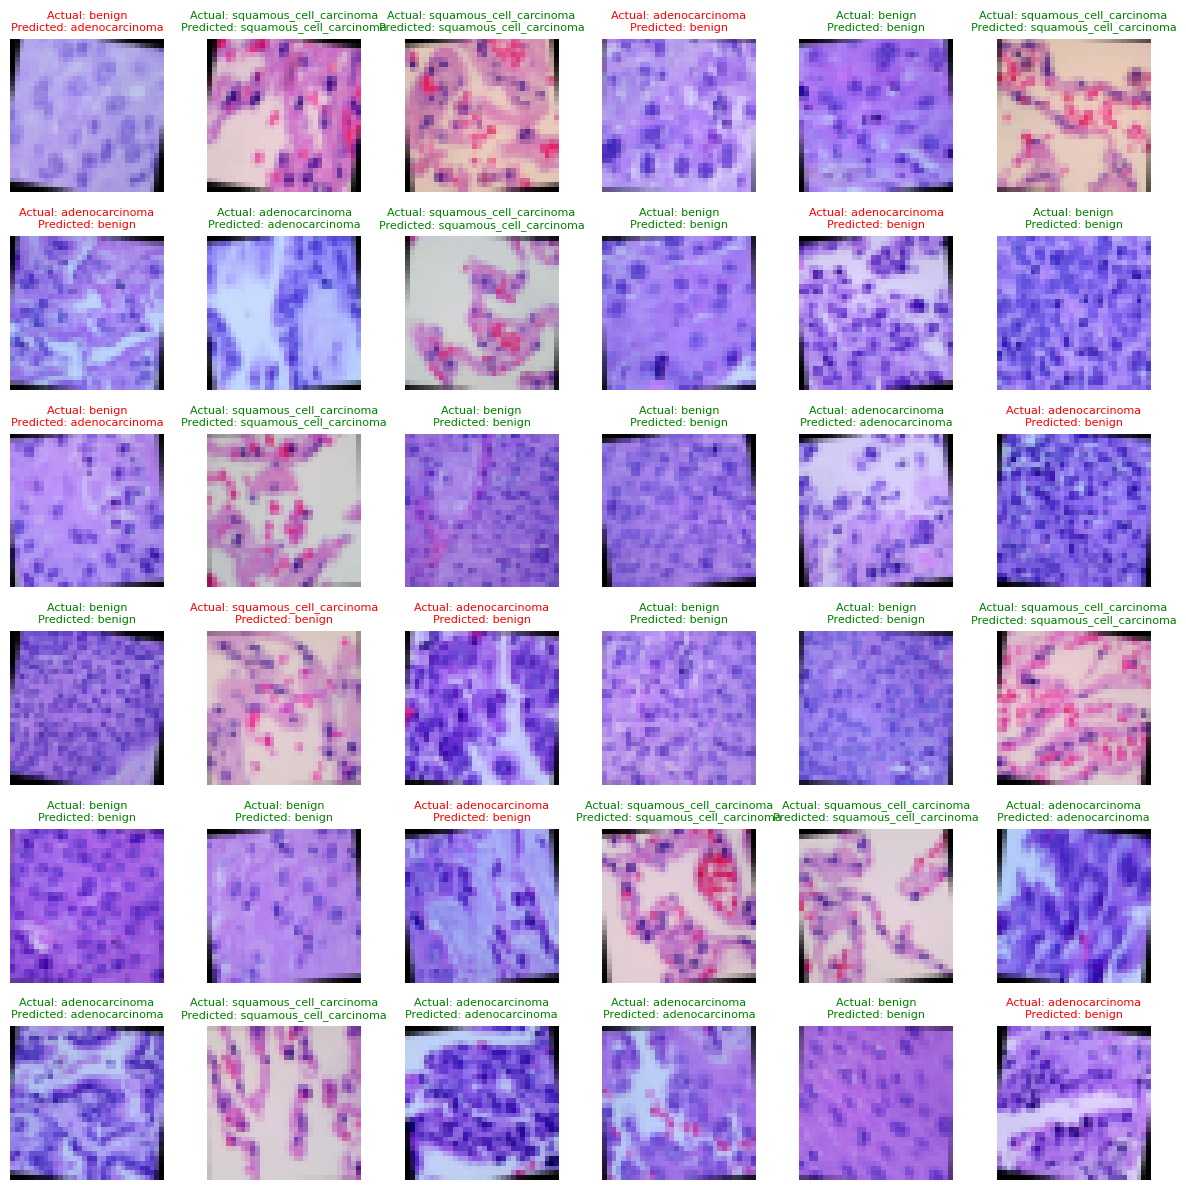

In [ ]:
import matplotlib.pyplot as plt
import random
import torchvision

def show_random_test_predictions(model, dataloader, class_names, num_images=16):
    model.eval()
    images_shown = 0
    fig, axes = plt.subplots(6, 6, figsize=(12, 12))
    axes = axes.flatten()

    all_images = []
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_images.extend(inputs.cpu())
            all_labels.extend(labels.cpu())
            all_preds.extend(preds.cpu())

    combined = list(zip(all_images, all_labels, all_preds))
    random.shuffle(combined)

    selected_images = random.sample(combined, min(num_images, len(combined)))

    for idx, (img, label, pred) in enumerate(selected_images):
        ax = axes[images_shown]
        ax.axis('off')

        img = img.numpy().transpose((1, 2, 0))
        img = np.clip((img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406], 0, 1)

        ax.imshow(img)

        predicted_class = class_names[pred]
        actual_class = class_names[label]
        title = f'Actual: {class_names[label]}\nPredicted: {class_names[pred]}'

        if predicted_class == actual_class:
            ax.set_title(title, color='green',fontsize=8)
        else:
            ax.set_title(title, color='red',fontsize=8)

        images_shown += 1
        if images_shown == num_images:
            break

    plt.tight_layout()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path = 'modelos/ResNET_lung_cancer.pth'
model = ResNet18().to(device)
model.load_state_dict(torch.load(path))
show_random_test_predictions(model, val_loader, classes, num_images=36)

## VGG-16

In [ ]:
# Define the VGG16-like model
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()

        # Define the convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # Conv1
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # Conv2
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pool 1

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Conv3
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Conv4
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pool 2

            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Conv5
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Conv6
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Conv7
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pool 3

            nn.Conv2d(256, 512, kernel_size=3, padding=1),  # Conv8
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv9
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv10
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Max Pool 4

            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv11
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv12
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),  # Conv13
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Max Pool 5
        )

        # Define the fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),  # Adjust input size according to CIFAR-10's image size (32x32)
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)  # Output layer (CIFAR-10 has 10 classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output from conv layers
        x = self.fc_layers(x)
        return x

In [ ]:
# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Definir transformaciones de preprocesamiento
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((32, 32)),  # Cambiar el tamaño de las imágenes
    transforms.ToTensor(),          # Convertir las imágenes en tensores
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización
])

# Cargar el dataset
data_dir = 'lung-cancer-histopathological-images/'

dataset = datasets.ImageFolder(os.path.join(data_dir), transform=transform)

train_size, val_size = int(0.8 * len(dataset)), int(0.2 * len(dataset))

train_dataset, val_dataset = random_split(dataset, [train_size, val_size]) # stratified split is better

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # shuffle to avoid memorization (overfitting)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Training

In [ ]:
# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/20], Loss: 0.9308
Epoch [2/20], Loss: 0.8770
Epoch [3/20], Loss: 0.7216
Epoch [4/20], Loss: 0.7541
Epoch [5/20], Loss: 0.5489
Epoch [6/20], Loss: 0.4670
Epoch [7/20], Loss: 0.3830
Epoch [8/20], Loss: 0.3255
Epoch [9/20], Loss: 8.7135
Epoch [10/20], Loss: 1.1033
Epoch [11/20], Loss: 1.1021
Epoch [12/20], Loss: 1.1004
Epoch [13/20], Loss: 1.1009
Epoch [14/20], Loss: 1.1001
Epoch [15/20], Loss: 1.1001
Epoch [16/20], Loss: 1.1001
Epoch [17/20], Loss: 1.1004
Epoch [18/20], Loss: 1.1007
Epoch [19/20], Loss: 1.1001
Epoch [20/20], Loss: 1.0995


### Testing

In [ ]:
# Testing the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10,000 test images: 32.57%


In [ ]:
torch.save(model.state_dict(), 'modelos/VGG16_lung_cancer.pth')

### Validation

<ipython-input-38-39b190fc693b>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


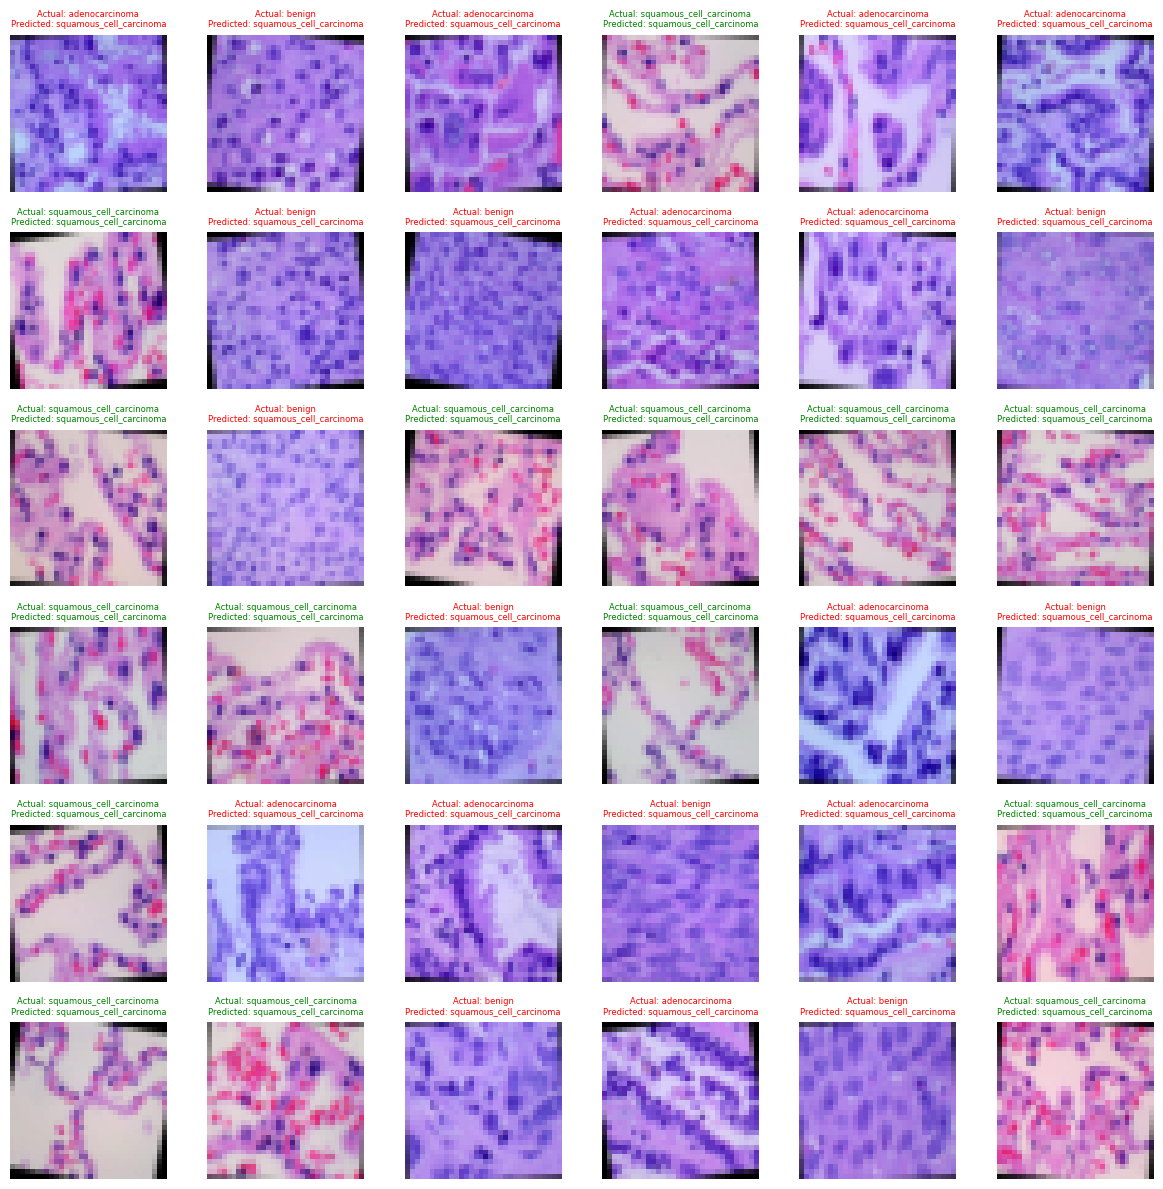

In [ ]:
import matplotlib.pyplot as plt
import random
import torchvision

def show_random_test_predictions(model, dataloader, class_names, num_images=16):
    model.eval()
    images_shown = 0
    fig, axes = plt.subplots(6, 6, figsize=(12, 12))
    axes = axes.flatten()

    all_images = []
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_images.extend(inputs.cpu())
            all_labels.extend(labels.cpu())
            all_preds.extend(preds.cpu())

    combined = list(zip(all_images, all_labels, all_preds))
    random.shuffle(combined)

    selected_images = random.sample(combined, min(num_images, len(combined)))

    for idx, (img, label, pred) in enumerate(selected_images):
        ax = axes[images_shown]
        ax.axis('off')

        img = img.numpy().transpose((1, 2, 0))
        img = np.clip((img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406], 0, 1)

        ax.imshow(img)

        predicted_class = class_names[pred]
        actual_class = class_names[label]
        title = f'Actual: {class_names[label]}\nPredicted: {class_names[pred]}'

        if predicted_class == actual_class:
            ax.set_title(title, color='green',fontsize=6)
        else:
            ax.set_title(title, color='red',fontsize=6)

        images_shown += 1
        if images_shown == num_images:
            break

    plt.tight_layout()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path = 'modelos/VGG16_lung_cancer.pth'
model = VGG16().to(device)
model.load_state_dict(torch.load(path))
show_random_test_predictions(model, val_loader, classes, num_images=36)

## GoogleNET

In [ ]:
class GoogleNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=3):  # num_classes ajustado para CIFAR-10
        super(GoogleNet, self).__init__()

        self.conv1 = conv_block(in_channels=in_channels, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.conv2 = conv_block(in_channels=64, out_channels=192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.inception3a = Inception_block(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception_block(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.inception4a = Inception_block(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception_block(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception_block(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception_block(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception_block(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.inception5a = Inception_block(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception_block(832, 384, 192, 384, 48, 128, 128)

        #self.avgpool = nn.AvgPool2d(kernel_size=2, stride=1)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.4)
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)
        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
class conv_block(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(conv_block, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        return torch.relu(self.bn(self.conv(x)))

In [ ]:
class Inception_block(nn.Module):
    def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_1x1pool):
        super(Inception_block, self).__init__()
        self.branch1 = conv_block(in_channels, out_1x1, kernel_size=(1, 1))

        self.branch2 = nn.Sequential(
            conv_block(in_channels, red_3x3, kernel_size=(1, 1)),
            conv_block(red_3x3, out_3x3, kernel_size=(3, 3), padding=(1, 1)),
        )

        self.branch3 = nn.Sequential(
            conv_block(in_channels, red_5x5, kernel_size=(1, 1)),
            conv_block(red_5x5, out_5x5, kernel_size=(5, 5), padding=(2, 2)),
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            conv_block(in_channels, out_1x1pool, kernel_size=(1, 1)),
        )

    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.branch4(x)], 1)

In [ ]:
# Definir transformaciones de preprocesamiento
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((32, 32)),  # Cambiar el tamaño de las imágenes
    transforms.ToTensor(),          # Convertir las imágenes en tensores
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalización
])

# Cargar el dataset
data_dir = 'lung-cancer-histopathological-images/'

dataset = datasets.ImageFolder(os.path.join(data_dir), transform=transform)

train_size, val_size = int(0.8 * len(dataset)), int(0.2 * len(dataset))

train_dataset, val_dataset = random_split(dataset, [train_size, val_size]) # stratified split is better

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # shuffle to avoid memorization (overfitting)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GoogleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training

In [ ]:
# Ciclo de entrenamiento
num_epochs=20
for epoch in range(num_epochs):  # 20 épocas de entrenamiento
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # Imprimir cada 200 lotes
            print(f'[Epoch {epoch + 1}, Lote {i + 1}] Pérdida: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Entrenamiento finalizado')

[Epoch 1, Lote 200] Pérdida: 0.371
[Epoch 2, Lote 200] Pérdida: 0.258
[Epoch 3, Lote 200] Pérdida: 0.219
[Epoch 4, Lote 200] Pérdida: 0.182
[Epoch 5, Lote 200] Pérdida: 0.179
[Epoch 6, Lote 200] Pérdida: 0.141
[Epoch 7, Lote 200] Pérdida: 0.169
[Epoch 8, Lote 200] Pérdida: 0.153
[Epoch 9, Lote 200] Pérdida: 0.099
[Epoch 10, Lote 200] Pérdida: 0.124
[Epoch 11, Lote 200] Pérdida: 0.087
[Epoch 12, Lote 200] Pérdida: 0.086
[Epoch 13, Lote 200] Pérdida: 0.061
[Epoch 14, Lote 200] Pérdida: 0.064
[Epoch 15, Lote 200] Pérdida: 0.055
[Epoch 16, Lote 200] Pérdida: 0.052
[Epoch 17, Lote 200] Pérdida: 0.050
[Epoch 18, Lote 200] Pérdida: 0.046
[Epoch 19, Lote 200] Pérdida: 0.044
[Epoch 20, Lote 200] Pérdida: 0.024
Entrenamiento finalizado


### Testing

In [ ]:
# Testing the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10,000 test images: 97.53%


In [ ]:
torch.save(model.state_dict(), 'modelos/GoogleNet_lung_cancer.pth')

### Validation

<ipython-input-45-a9110ac1f38a>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


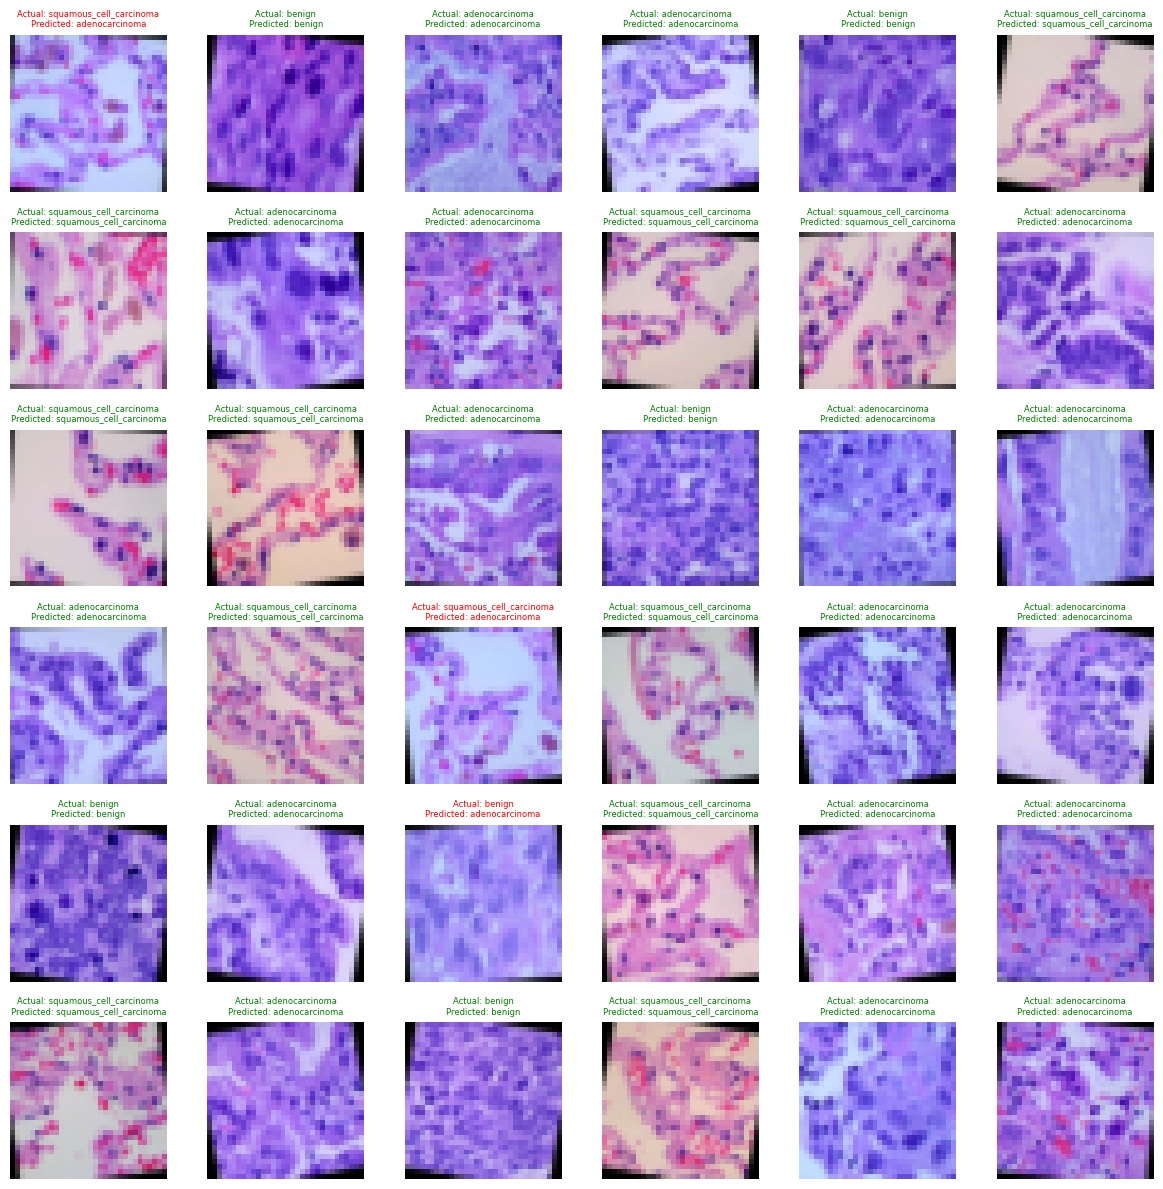

In [ ]:
import matplotlib.pyplot as plt
import random
import torchvision

def show_random_test_predictions(model, dataloader, class_names, num_images=16):
    model.eval()
    images_shown = 0
    fig, axes = plt.subplots(6, 6, figsize=(12, 12))
    axes = axes.flatten()

    all_images = []
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_images.extend(inputs.cpu())
            all_labels.extend(labels.cpu())
            all_preds.extend(preds.cpu())

    combined = list(zip(all_images, all_labels, all_preds))
    random.shuffle(combined)

    selected_images = random.sample(combined, min(num_images, len(combined)))

    for idx, (img, label, pred) in enumerate(selected_images):
        ax = axes[images_shown]
        ax.axis('off')

        img = img.numpy().transpose((1, 2, 0))
        img = np.clip((img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406], 0, 1)

        ax.imshow(img)

        predicted_class = class_names[pred]
        actual_class = class_names[label]
        title = f'Actual: {class_names[label]}\nPredicted: {class_names[pred]}'

        if predicted_class == actual_class:
            ax.set_title(title, color='green',fontsize=6)
        else:
            ax.set_title(title, color='red',fontsize=6)

        images_shown += 1
        if images_shown == num_images:
            break

    plt.tight_layout()
    plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path = 'modelos/GoogleNet_lung_cancer.pth'
model = GoogleNet().to(device)
model.load_state_dict(torch.load(path))
show_random_test_predictions(model, val_loader, classes, num_images=36)

In [ ]:
import pandas as pd

# Crear un diccionario con datos
data = {
    'Modelo': ['ResNet', 'VGG-16', 'Google Net'],
    'Cant. Imágenes': [10000, 10000, 10000],
    'Accuracy (%)': [98.20, 32.57, 97.53]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
df


,Modelo,Cant. Imágenes,Accuracy (%)
0,ResNet,10000,98.20
1,VGG-16,10000,32.57
2,Google Net,10000,97.53


Como se puede observar ResNet es superior a Google Net para este procesamiento; esto puede sostenerse al manejo de las conexiones residuales para la solución del desvanecimiento del gradiente, aunque para este caso no se observa una diferencia tan clara como con VGG-16; Resnet en este caso puede profundizar mucho más que VGG-16 sin perder la precisión, algo que es una limitante para VGG-16 cuando se trata de redes más profundas